In [74]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D

In [87]:
class KMeans:
    def __init__(self, clusters=2, iters=100, elbow=False, max_elbow=8):
        self.clusters_ = clusters
        self.iters_ = iters
        self.elbow_ = elbow
        self.max_elbow_ = max_elbow
        
    def compute_cost_(self):
        return 1 / self.m_ * sum(np.linalg.norm(self.X_[i] - self.K_[self.C_[i]]) ** 2 for i in range(self.m_))
    
    def fit(self, X):
        self.X_ = X
        self.m_ = self.X_.shape[0]
        if self.elbow_:
            self.K_costs_ = np.empty(self.max_elbow_)
        for clusters in range(1, 9) if self.elbow_ else (self.clusters_,):
            if self.elbow_:
                print(f'clusters: {clusters}')
            self.clusters_ = clusters
            self.min_cost_ = np.inf
            for i in range(self.iters_):
                self.K_ = self.X_[np.random.choice(self.m_, self.clusters_, replace=False)]
                self.C_ = np.empty(self.m_, dtype=int)
                while True:
                    for j in range(self.m_):
                        norms = np.array([np.linalg.norm(self.X_[j] - self.K_[k]) for k in range(self.clusters_)])
                        self.C_[j] = np.argmin(norms)
                    prev_K = self.K_.copy()
                    j = 0
                    while j < self.clusters_:
                        indices = np.where(clf.C_ == j)[0]
                        if indices.size:
                            self.K_[j] = clf.X_[indices].mean(0)
                        else:
                            self.K_ = np.delete(self.K_, j, 0)
                            self.clusters_ -= 1
                        j += 1
                    if np.array_equal(self.K_, prev_K):
                        break
                cost = self.compute_cost_()
                if cost < self.min_cost_:
                    self.min_cost_ = cost
                    self.min_K_ = self.K_.copy()
                    self.min_C_ = self.C_.copy()
                print(f'iteration: {i + 1}     cost: {cost}')
            print(f'min cost: {self.min_cost_}')
            if self.elbow_:
                self.K_costs_[clusters - 1] = self.min_cost_
        if self.elbow_:
            plt.plot(range(1, 9), self.K_costs_)

In [88]:
img = Image.open('toucan.jpg').reduce(4)

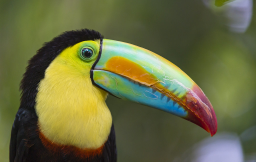

In [89]:
img

In [90]:
clf = KMeans(clusters=16, iters=3, elbow=False, max_elbow=24)

In [ ]:
clf.fit(np.asarray(img).reshape(-1, 3))